<a href="https://colab.research.google.com/github/JSEFERINO/Dise-o_de_Experimentos_DOE/blob/main/C_DOE_DCA_DBCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos 2023**
## **TEMA 1: Diseños completamente aleatorizados DCA**
### **1.1 Librerias básicas**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats


### **1.2. El Problema**
- **Un fabricante de calzado desea mejorar la calidad de las suelas,
las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B,
C y D disponibles en el mercado. Para ello, prueba los cueros con
una máquina que hace pasar los zapatos por una superficie abrasiva.
La suela de los zapatos se desgasta al pasarla por dicha superficie.
Como criterio de desgaste se usa la pérdida de peso después de un
número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis
de cada tipo de cuero. Al hacer las pruebas en orden completamente
al azar se evitan sesgos y las mediciones en un tipo de cuero resultan
independiente de las demás. Los datos (en mg) sobre el desgaste de
cada tipo de cuero se muestran en la tabla siguiente:**

|Tipo de cuero| |||Desgaste (mg)|||
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|A| 264| 260| 258| 241| 262| 255|
|B| 208| 220| 216| 200| 213| 206|
|C| 220| 263| 219| 225| 230| 228|
|D| 217| 226| 215| 224| 220| 222|

#### **1.3 ¿Existen diferencias en el desgaste promedio de los diferentes tipos de cuero?**

# **a. Los niveles del Factor como listas: Ingresamos los datos como filas**

In [ ]:
# **a. Los niveles del Factor como listas**
Cuero_A = [264, 260, 258, 241, 262, 255]
Cuero_B =  [208, 220, 216, 200, 213, 206]
Cuero_C = [220, 263, 219, 225, 230, 228]
Cuero_D = [217, 226, 215, 224, 220, 222]

# **b. Construimos el diccionario con los niveles del factor**

In [ ]:
# **b. Construimos el diccionario con los niveles del factor**
dic_Tipos_Cuero = {'Cuero_A':Cuero_A, 'Cuero_B':Cuero_B, 'Cuero_C':Cuero_C, 'Cuero_D':Cuero_D}

# **c. Nuestro DataFrame**

In [ ]:
# **c. Nuestro DataFrame**
Desgaste = pd.DataFrame(dic_Tipos_Cuero)
Desgaste

,Cuero_A,Cuero_B,Cuero_C,Cuero_D
0,264,208,220,217
1,260,220,263,226
2,258,216,219,215
3,241,200,225,224
4,262,213,230,220
5,255,206,228,222


# **d. Accediendo al atributo shape, el cual me muestra la cantidad de filas y columnas**

In [ ]:
# **d. Accediendo al atributo shape, el cual me muestra la cantidad de filas y columnas**
Desgaste.shape

(6, 4)

In [ ]:
# igual resultad con accediendo al atributo index
Desgaste.index

RangeIndex(start=0, stop=6, step=1)

# **e. Accediendo al atributo columns**

In [ ]:
# **e. Accediendo al atributo columns**
Desgaste.columns

Index(['Cuero_A', 'Cuero_B', 'Cuero_C', 'Cuero_D'], dtype='object')

# **f. accediendo al atributo tipo de datos de cada columna**

In [ ]:
# **f. accediendo al atributo tipo de datos de cada columna**
Desgaste.dtypes

Cuero_A    int64
Cuero_B    int64
Cuero_C    int64
Cuero_D    int64
dtype: object

# **g. Análisis descriptivo de los datos del DataFrame**

In [ ]:
# **g. Análisis descriptivo de los datos del DataFrame**
Desgaste.describe()

,Cuero_A,Cuero_B,Cuero_C,Cuero_D
count,6.000000,6.000000,6.000000,6.000000
mean,256.666667,210.500000,230.833333,220.666667
std,8.286535,7.259477,16.339115,4.179314
min,241.000000,200.000000,219.000000,215.000000
25%,255.750000,206.500000,221.250000,217.750000
50%,259.000000,210.500000,226.500000,221.000000
75%,261.500000,215.250000,229.500000,223.500000
max,264.000000,220.000000,263.000000,226.000000


# **h. Haciendo el analisis boxplot**

<Axes: >

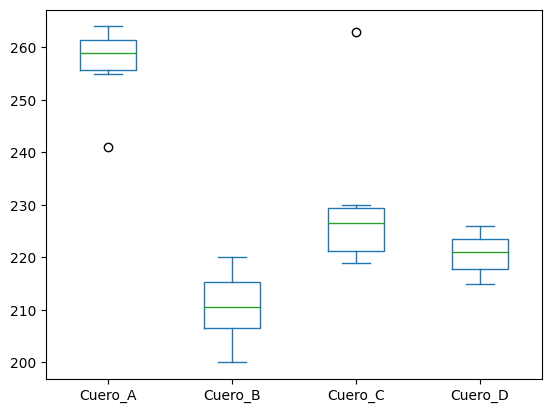

In [ ]:
# **h. Haciendo el analisis descriptivo**
Desgaste.plot.box()

In [ ]:
# Número de observaciones por grupo
# ==============================================================================
Desgaste.groupby('Cuero_A').size()

Cuero_A
241    1
255    1
258    1
260    1
262    1
264    1
dtype: int64

# **i. Reescribiendo el DataFrame**

In [ ]:
# **i. Reescribiendo el DataFrame**
Tipo_Cuero = (['A']*6+['B']*6+['C']*6+['D']*6)
Tipo_Cuero

['A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D']

In [ ]:
Desgaste = [264, 260, 258, 241, 262, 255, 208, 220, 216, 200, 213, 206, 220, 263, 219, 225, 230, 228, 217, 226, 215, 224, 220, 222]

In [ ]:
DCA  = pd.DataFrame({'Tipo_Cuero': Tipo_Cuero, 'Desgaste': Desgaste})
DCA

,Tipo_Cuero,Desgaste
0,A,264
1,A,260
2,A,258
3,A,241
4,A,262
5,A,255
6,B,208
7,B,220
8,B,216
9,B,200


# **j. Analisis descriptivo de la variable**

In [ ]:
# **j. Analisis descriptivo de la variable**
DCA.describe()

,Desgaste
count,24.000000
mean,229.666667
std,19.892465
min,200.000000
25%,216.750000
50%,223.000000
75%,244.500000
max,264.000000


## **Precio Desgaste y desviación típica por Tipo_Cuero**

In [ ]:
## **Precio Desgaste y desviación típica por Tipo_Cuero**
DCA.groupby('Tipo_Cuero')['Desgaste'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Tipo_Cuero,,,,
A,256.666667,8.286535,241,264
B,210.500000,7.259477,200,220
C,230.833333,16.339115,219,263
D,220.666667,4.179314,215,226


## **Cuartiles**

In [ ]:
## **Cuartiles**
DCA.groupby('Tipo_Cuero')['Desgaste'].quantile([.25, .50, .75])

Tipo_Cuero      
A           0.25    255.75
            0.50    259.00
            0.75    261.50
B           0.25    206.50
            0.50    210.50
            0.75    215.25
C           0.25    221.25
            0.50    226.50
            0.75    229.50
D           0.25    217.75
            0.50    221.00
            0.75    223.50
Name: Desgaste, dtype: float64

# **k. BoxPlot para DCA**

<Axes: title={'center': 'Desgaste vs Tipo_Cuero'}, xlabel='Tipo_Cuero', ylabel='Desgaste'>

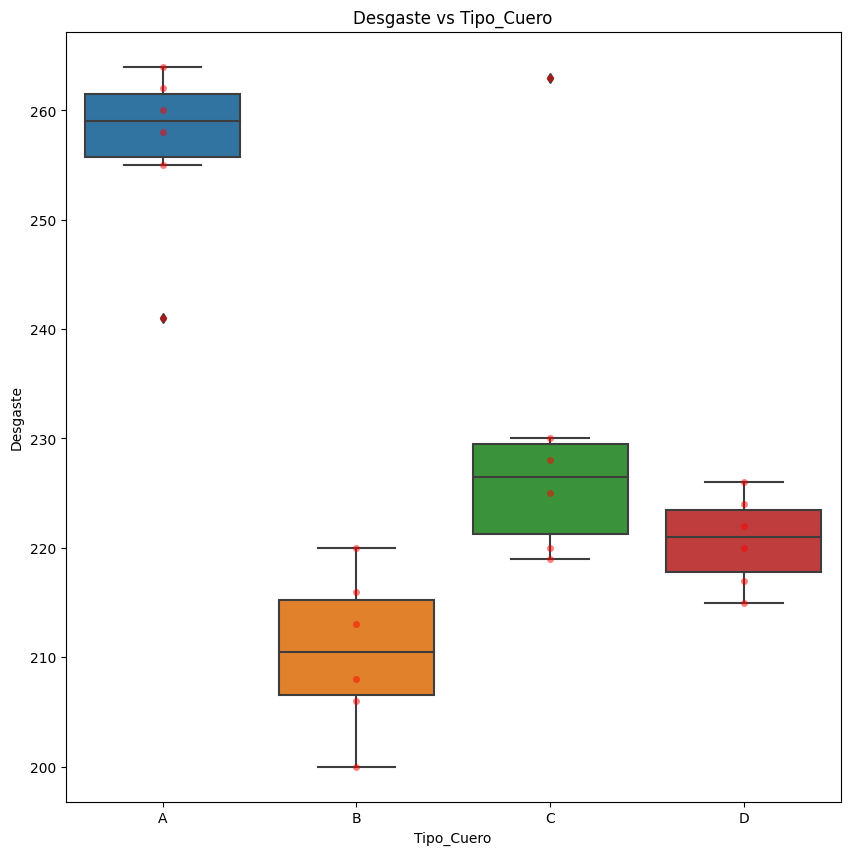

In [ ]:
# **k. BoxPlot para DCA**
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Desgaste vs Tipo_Cuero')
sns.boxplot(x="Tipo_Cuero", y=Desgaste,data=DCA,ax=ax)
sns.swarmplot(x="Tipo_Cuero", y="Desgaste", data=DCA, color='red', alpha=0.5, ax=ax)

# **l. Análisis de Varianza**

In [ ]:
# **l. Análisis de Varianza**
modelDCA = ols("Desgaste ~ Tipo_Cuero", data = DCA).fit()
anova_result = sm.stats.anova_lm(modelDCA, typ=2)
print (anova_result)

                 sum_sq    df          F    PR(>F)
Tipo_Cuero  7072.333333   3.0  23.237501  0.000001
Residual    2029.000000  20.0        NaN       NaN


In [ ]:
anova_result.T

,Tipo_Cuero,Residual
sum_sq,7072.333333,2029.0
df,3.000000,20.0
F,23.237501,NaN
PR(>F),0.000001,NaN


# **m. Análisis de Varianza2**

In [ ]:
# **m. Análisis de Varianza2**
modeloDCA2 = smf.ols("Desgaste ~ C(Tipo_Cuero)", data = DCA).fit()
print(modeloDCA2.summary())


                            OLS Regression Results                            
Dep. Variable:               Desgaste   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     23.24
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.00e-06
Time:                        22:58:12   Log-Likelihood:                -87.301
No. Observations:                  24   AIC:                             182.6
Df Residuals:                      20   BIC:                             187.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            256.6667      4

# **n. Análisis de Varianza3**

In [ ]:
# **n. Análisis de Varianza3**
modeloDCA3 = smf.ols("Desgaste ~ Tipo_Cuero-1", data = DCA).fit()
print(modeloDCA3.summary())

                            OLS Regression Results                            
Dep. Variable:               Desgaste   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     23.24
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.00e-06
Time:                        22:58:12   Log-Likelihood:                -87.301
No. Observations:                  24   AIC:                             182.6
Df Residuals:                      20   BIC:                             187.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Tipo_Cuero[A]   256.6667      4.112     62.419

# **o. Comparaciones Múltiples**

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-46.1667,0.0,-62.4431,-29.8903,True
A,C,-25.8333,0.0013,-42.1097,-9.5569,True
A,D,-36.0,0.0,-52.2764,-19.7236,True
B,C,20.3333,0.0112,4.0569,36.6097,True
B,D,10.1667,0.3263,-6.1097,26.4431,False
C,D,-10.1667,0.3263,-26.4431,6.1097,False


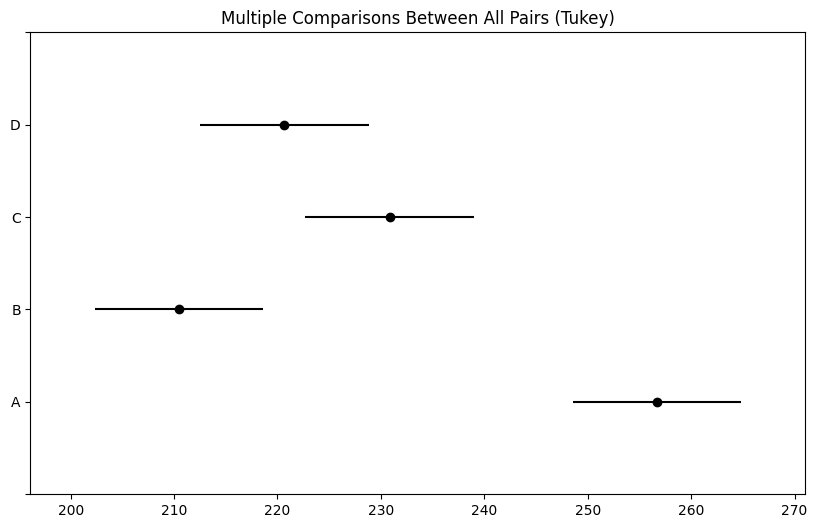

In [ ]:
# **Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=DCA["Desgaste"],     # Data
                          groups=DCA["Tipo_Cuero"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

# **p. Normalidad de los Residuos: Shapiro Wilks y Gráfico de Probabilidad para los residuos**

## **Prueba Analítica con Shapiro**

In [ ]:
# **Forma 1. Shapiro Wilks**
stats.shapiro(modelDCA.resid)

ShapiroResult(statistic=0.8781194686889648, pvalue=0.0076182521879673)

In [ ]:
# **Forma 2. Shapiro Wilks**
w, pvalue = stats.shapiro(modelDCA.resid)
print(w, pvalue)

0.8781194686889648 0.0076182521879673


In [ ]:
DCA['Desgaste'].describe()

count     24.000000
mean     229.666667
std       19.892465
min      200.000000
25%      216.750000
50%      223.000000
75%      244.500000
max      264.000000
Name: Desgaste, dtype: float64

## **Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Todos los datos**

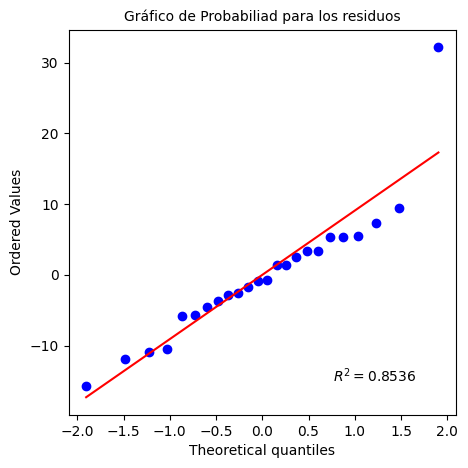

In [ ]:
# **Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modelDCA.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

## **Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Por secciones**

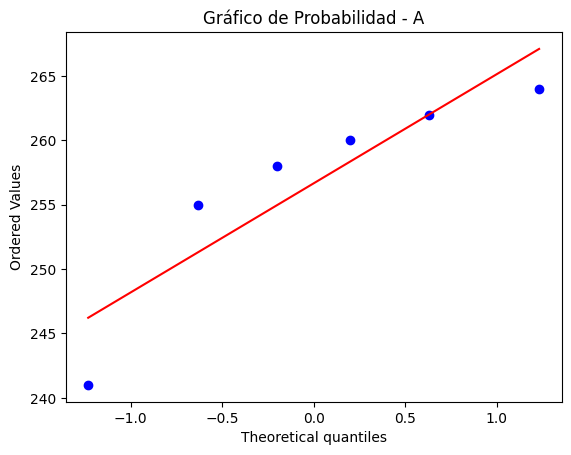

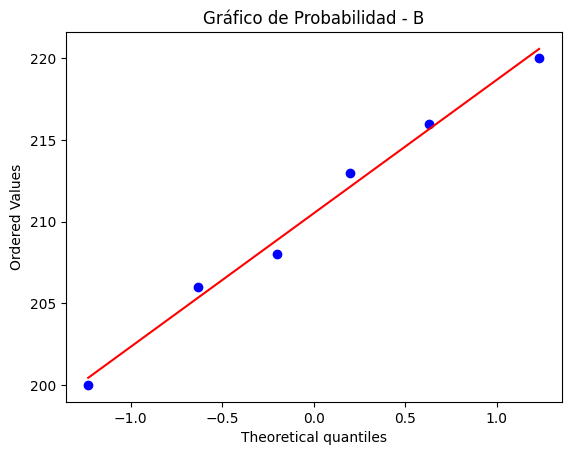

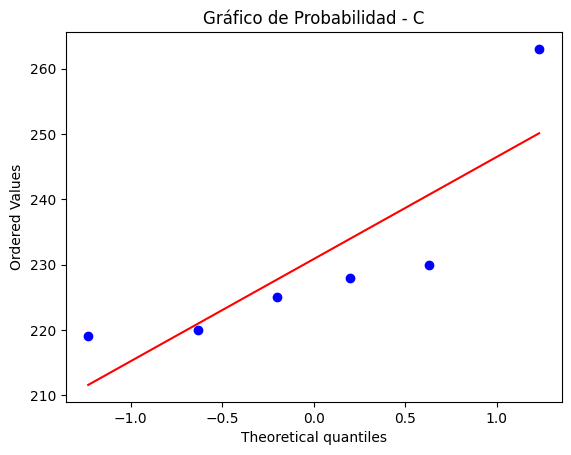

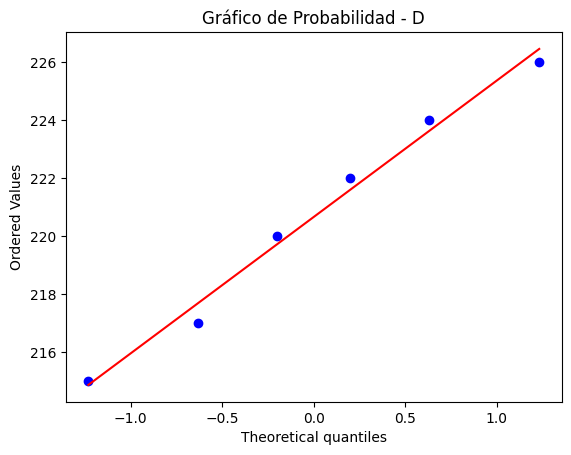

In [ ]:
unique_Tipo_Cuero = DCA['Tipo_Cuero'].unique()
for Tipo_Cuero in unique_Tipo_Cuero:
    stats.probplot(DCA[DCA['Tipo_Cuero'] == Tipo_Cuero]['Desgaste'], dist="norm", plot=plt)
    plt.title("Gráfico de Probabilidad - "+Tipo_Cuero)
    plt.show()

In [ ]:
desgaste2 =modelDCA.resid
desgaste2
desgaste2.describe()

count    2.400000e+01
mean    -1.894781e-14
std      9.392411e+00
min     -1.566667e+01
25%     -4.791667e+00
50%     -7.500000e-01
75%      3.833333e+00
max      3.216667e+01
dtype: float64

In [ ]:
desgaste2

0      7.333333
1      3.333333
2      1.333333
3    -15.666667
4      5.333333
5     -1.666667
6     -2.500000
7      9.500000
8      5.500000
9    -10.500000
10     2.500000
11    -4.500000
12   -10.833333
13    32.166667
14   -11.833333
15    -5.833333
16    -0.833333
17    -2.833333
18    -3.666667
19     5.333333
20    -5.666667
21     3.333333
22    -0.666667
23     1.333333
dtype: float64

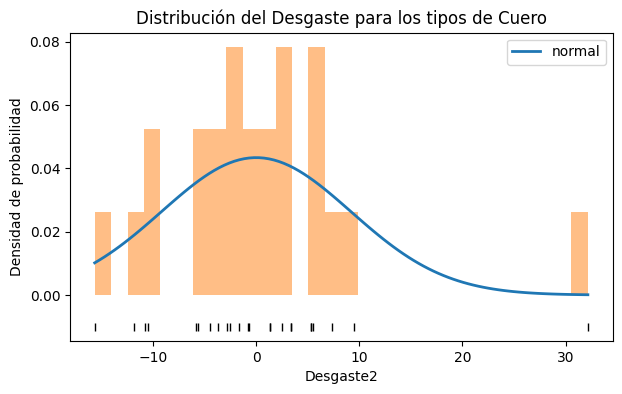

In [ ]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(desgaste2)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(desgaste2), max(desgaste2), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=desgaste2, density=True, bins=30,  alpha=0.5)
ax.plot(desgaste2, np.full_like(desgaste2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del Desgaste para los tipos de Cuero')
ax.set_xlabel('Desgaste2')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

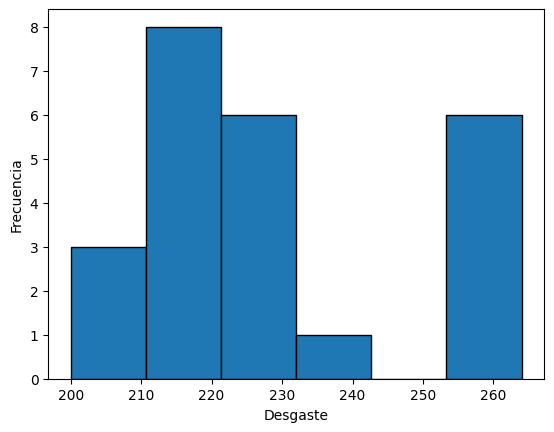

In [ ]:
# **Histograma de Residuos**
plt.hist(DCA['Desgaste'], bins='auto', histtype='bar', ec='k')

plt.xlabel("Desgaste")
plt.ylabel('Frecuencia')
plt.show()

# **Histograma de Residuos**

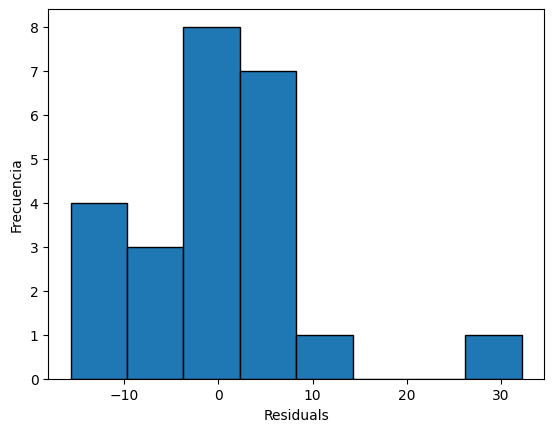

In [ ]:
# **Histograma de Residuos**
plt.hist(modelDCA.resid, bins='auto', histtype='bar', ec='k')

plt.xlabel("Residuals")
plt.ylabel('Frecuencia')
plt.show()

# **Gráfico Q-Q**

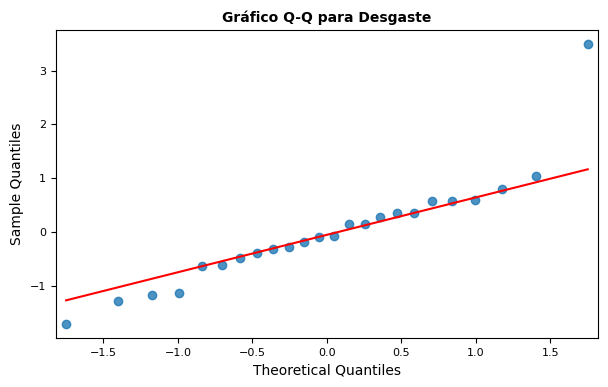

In [ ]:
# **Gráfico Q-Q**
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    desgaste2,
    fit   = True,
    line  = 'q',
    alpha = 0.8,
    lw    = 5,
    ax    = ax
)
ax.set_title('Gráfico Q-Q para Desgaste', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 8)

# **q. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [ ]:
# q. Homocedasticidad de los residuos: Usando la prueba de Levene
stats.levene(DCA['Desgaste'][DCA['Tipo_Cuero'] == 'A'],
             DCA['Desgaste'][DCA['Tipo_Cuero'] == 'B'],
             DCA['Desgaste'][DCA['Tipo_Cuero'] == 'C'],
             DCA['Desgaste'][DCA['Tipo_Cuero'] == 'D'])

LeveneResult(statistic=0.6655480984340044, pvalue=0.5829775895886209)

# **2.0. Diseños en Bloques Completos al Azar - DBCA**

### **2.1 Problema de Aplicación.** _Se evalúa la eficacia de sulfato ferroso a 4 diferentes concentraciones $2$, $2.5$, $3$, y $4$ $mg/kg/día$ para combatir la anemia en personas con desnutrición. Dada la variabilidad de pesos y sexos, se decidió agrupar en bloque de personas por pesos lo más semejantes posibles. Se les dio el tratamiento durante 4 meses y se procedió a determinar su volumen sanguíneo dando los siguientes resultados:_

|Pesos\Tratamientos|T1 |T2| T3| T4| Total ($Y_{.j}$)|
|:--:|:--:|:--:|:--:|:--:|:--:|
|I |4.1| 6.5| 4.1| 4.9| 19.6|
|II |4.1| 5.3| 4.0| 6.2| 19.6|
|III |6.5| 6.9| 4.5| 4.8| 22.7|
|IV |4.3| 6.8| 4.3| 4.2| 19.6|
|V |6.0| 6.5| 4.1| 6.9| 23.5|
|Total Tratamiento ($Y_i.$)| 25| 32| 21| 27| 105|

- **Las hipótesis a probar: Para los tratamientos**
$$H_{01}: \mu_{T_1}=\mu_{T_2}=\mu_{T_3}=\mu_{T_4}$$ $$Vs$$ $$H_{a1}: \mu_{T_i}\neq\mu_{T_j}$$ _Al menos un tratamiento es diferente_

- **Las hipótesis a probar: Para los Bloques**
$$H_{02}: \mu_{B_1}=\mu_{B_2}=\mu_{B_3}=\mu_{B_4}=\mu_{B_4}$$ $$Vs$$ $$H_{a2}: \mu_{B_i}\neq\mu_{B_j}$$  _Al menos un bloque (pesos) es
diferente_

# **2.2 El DataFrame de los datos**

In [ ]:
# **2.2 El DataFrame de los datos**
Pesos = (['B1']*4+['B2']*4+['B3']*4+['B4']*4+['B5']*4)*1
S_Ferroso = (['T1']*1+['T2']*1+['T3']*1+['T4']*1)*5
V_Sanguineo =[4.1, 6.5, 4.1, 4.9,  4.1, 5.3, 4.0, 6.2,  6.5, 6.9, 4.5, 4.8, 4.3, 6.8, 4.3, 4.2,  6.0, 6.5, 4.1, 6.9]
dic_DBCA ={'Pesos': Pesos,'S_Ferroso': S_Ferroso, 'V_Sanguineo':V_Sanguineo}

DBCA  = pd.DataFrame(dic_DBCA)
DBCA

,Pesos,S_Ferroso,V_Sanguineo
0,B1,T1,4.1
1,B1,T2,6.5
2,B1,T3,4.1
3,B1,T4,4.9
4,B2,T1,4.1
5,B2,T2,5.3
6,B2,T3,4.0
7,B2,T4,6.2
8,B3,T1,6.5
9,B3,T2,6.9


# **2.3. Analisis descriptivo de la variable**

In [ ]:
# **2.3. Analisis descriptivo de la variable**
DBCA.describe()


,V_Sanguineo
count,20.000000
mean,5.250000
std,1.139021
min,4.000000
25%,4.175000
50%,4.850000
75%,6.500000
max,6.900000


# **2.4 Acediendo a algunos atributos del DataFrame**

In [ ]:
# **a Acediendo al atributo columns**
DBCA.columns

Index(['Pesos', 'S_Ferroso', 'V_Sanguineo'], dtype='object')

In [ ]:
# **b Accediendo al atributo tipo de datos de cada columna**
DBCA.dtypes

Pesos           object
S_Ferroso       object
V_Sanguineo    float64
dtype: object

In [ ]:
#**c. Contar las observaciones**
DBCA["Pesos"].value_counts()

B1    4
B2    4
B3    4
B4    4
B5    4
Name: Pesos, dtype: int64

In [ ]:
#**d. Contar las observaciones**
DBCA["S_Ferroso"].value_counts()

T1    5
T2    5
T3    5
T4    5
Name: S_Ferroso, dtype: int64

In [ ]:
#**e. Contar las observaciones**
DBCA["V_Sanguineo"].value_counts()

4.1    4
6.5    3
6.9    2
4.3    2
4.9    1
5.3    1
4.0    1
6.2    1
4.5    1
4.8    1
6.8    1
4.2    1
6.0    1
Name: V_Sanguineo, dtype: int64

In [ ]:
DBCA[["Pesos","V_Sanguineo"]].describe()

,V_Sanguineo
count,20.000000
mean,5.250000
std,1.139021
min,4.000000
25%,4.175000
50%,4.850000
75%,6.500000
max,6.900000


In [ ]:
DBCA[["Pesos",'V_Sanguineo']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Pesos,B1,B1,B1,B1,B2,B2,B2,B2,B3,B3,B3,B3,B4,B4,B4,B4,B5,B5,B5,B5
V_Sanguineo,4.1,6.5,4.1,4.9,4.1,5.3,4.0,6.2,6.5,6.9,4.5,4.8,4.3,6.8,4.3,4.2,6.0,6.5,4.1,6.9


# **2.5. BoxPlot para DBCA : V_Sanguineo vs S_Ferroso**

<Axes: title={'center': 'V_Sanguineo vs S_Ferroso'}, xlabel='S_Ferroso', ylabel='V_Sanguineo'>

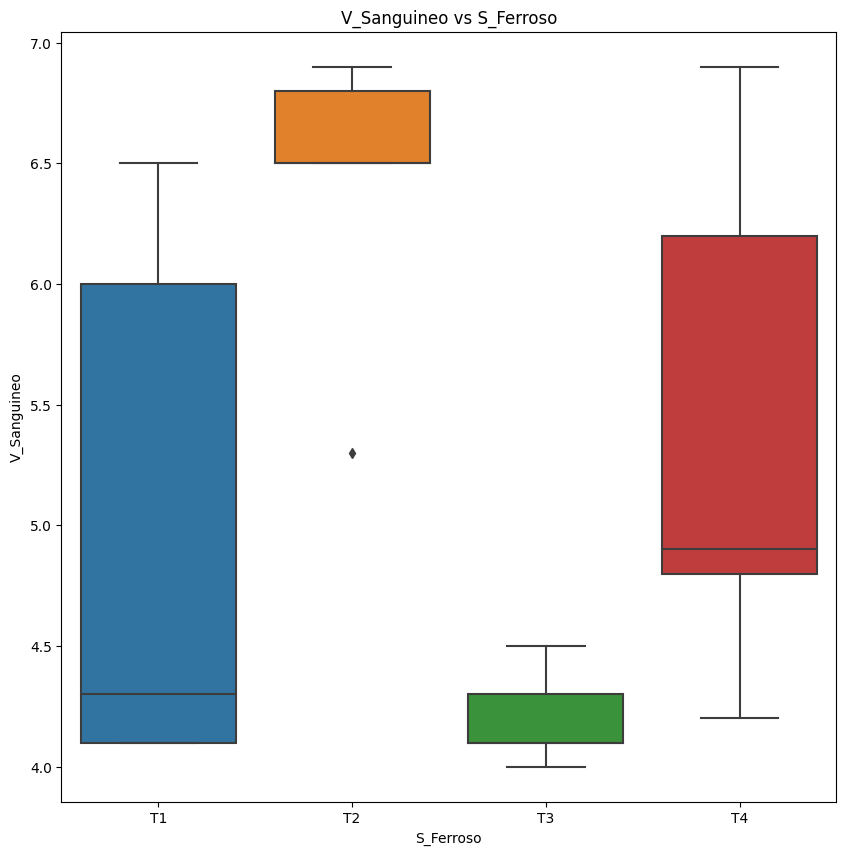

In [ ]:
# **2.5. BoxPlot para DBCA: V_Sanguineo vs S_Ferroso**
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('V_Sanguineo vs S_Ferroso')
sns.boxplot(x="S_Ferroso", y='V_Sanguineo',data=DBCA,ax=ax)


# **2.6. BoxPlot para DBCA: V_Sanguineo vs Pesos**

<Axes: title={'center': 'V_Sanguineo vs Pesos'}, xlabel='Pesos', ylabel='V_Sanguineo'>

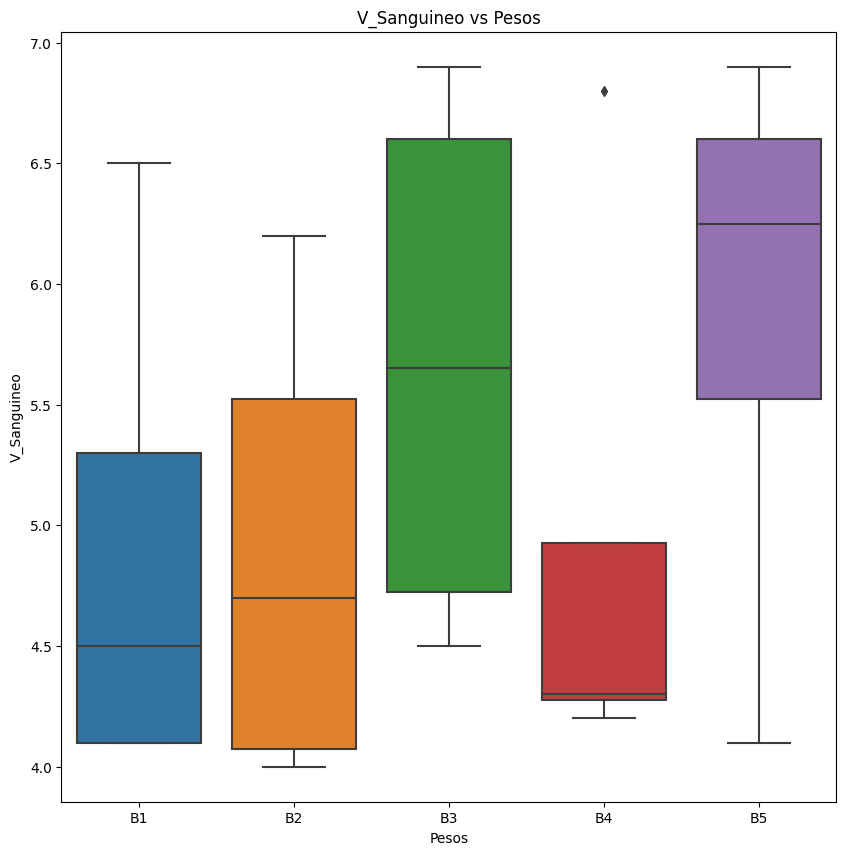

In [ ]:
# **2.6. BoxPlot para DBCA: V_Sanguineo vs Pesos**
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('V_Sanguineo vs Pesos')
sns.boxplot(x="Pesos", y='V_Sanguineo',data=DBCA,ax=ax)


# **2.7 Diagrama Bivariado no es sposible dado que no hay replicas**

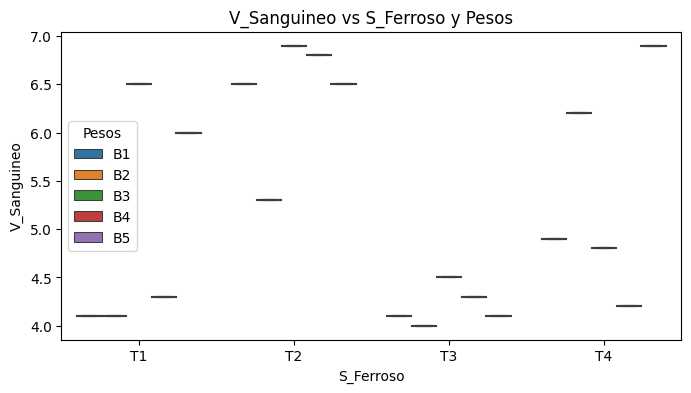

In [ ]:
# **2.7 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('V_Sanguineo vs S_Ferroso y Pesos')
sns.boxplot(x="S_Ferroso", y="V_Sanguineo", hue='Pesos', data=DBCA, ax=ax);

# **2.8 Análisis de Varianza Tipo I**

In [ ]:
# **2.8 Análisis de Varianza Tipo I**
modeloDBCA = ols("V_Sanguineo ~ S_Ferroso + Pesos", data = DBCA).fit()
anova_result2 = sm.stats.anova_lm(modeloDBCA, typ=2)
print (anova_result2)

           sum_sq    df         F    PR(>F)
S_Ferroso  12.550   3.0  6.015578  0.009644
Pesos       3.755   4.0  1.349910  0.307973
Residual    8.345  12.0       NaN       NaN


In [ ]:
anova_result2.T

,S_Ferroso,Pesos,Residual
sum_sq,12.550000,3.755000,8.345
df,3.000000,4.000000,12.000
F,6.015578,1.349910,NaN
PR(>F),0.009644,0.307973,NaN


In [ ]:
print(modeloDBCA.summary())

                            OLS Regression Results                            
Dep. Variable:            V_Sanguineo   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     3.349
Date:                Tue, 09 May 2023   Prob (F-statistic):             0.0321
Time:                        22:58:26   Log-Likelihood:                -19.638
No. Observations:                  20   AIC:                             55.28
Df Residuals:                      12   BIC:                             63.24
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.6500      0.527     

# **2.9 Análisis de Varianza Tipo II**

In [ ]:
# **2.9 Análisis de Varianza Tipo II**
modeloDBCA2 = smf.ols("V_Sanguineo ~ S_Ferroso + Pesos", data = DBCA).fit()
print(modeloDBCA2.summary())

                            OLS Regression Results                            
Dep. Variable:            V_Sanguineo   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     3.349
Date:                Tue, 09 May 2023   Prob (F-statistic):             0.0321
Time:                        22:58:26   Log-Likelihood:                -19.638
No. Observations:                  20   AIC:                             55.28
Df Residuals:                      12   BIC:                             63.24
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.6500      0.527     

In [ ]:
anova_result3 = sm.stats.anova_lm(modeloDBCA2, typ=2)
anova_result3.T

,S_Ferroso,Pesos,Residual
sum_sq,12.550000,3.755000,8.345
df,3.000000,4.000000,12.000
F,6.015578,1.349910,NaN
PR(>F),0.009644,0.307973,NaN


In [ ]:
# **2.9 Análisis de Varianza Tipo II**
modeloDBCA2 = smf.ols("V_Sanguineo ~ S_Ferroso-1 + Pesos", data = DBCA).fit()
print(modeloDBCA2.summary())

                            OLS Regression Results                            
Dep. Variable:            V_Sanguineo   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     3.349
Date:                Tue, 09 May 2023   Prob (F-statistic):             0.0321
Time:                        22:58:26   Log-Likelihood:                -19.638
No. Observations:                  20   AIC:                             55.28
Df Residuals:                      12   BIC:                             63.24
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
S_Ferroso[T1]     4.6500      0.527      8.817

# **2.10 Comparaciones Múltiples:S_Ferroso**

group1,group2,meandiff,p-adj,lower,upper,reject
T1,T2,1.4,0.0903,-0.1736,2.9736,False
T1,T3,-0.8,0.4858,-2.3736,0.7736,False
T1,T4,0.4,0.8848,-1.1736,1.9736,False
T2,T3,-2.2,0.0051,-3.7736,-0.6264,True
T2,T4,-1.0,0.3011,-2.5736,0.5736,False
T3,T4,1.2,0.1705,-0.3736,2.7736,False


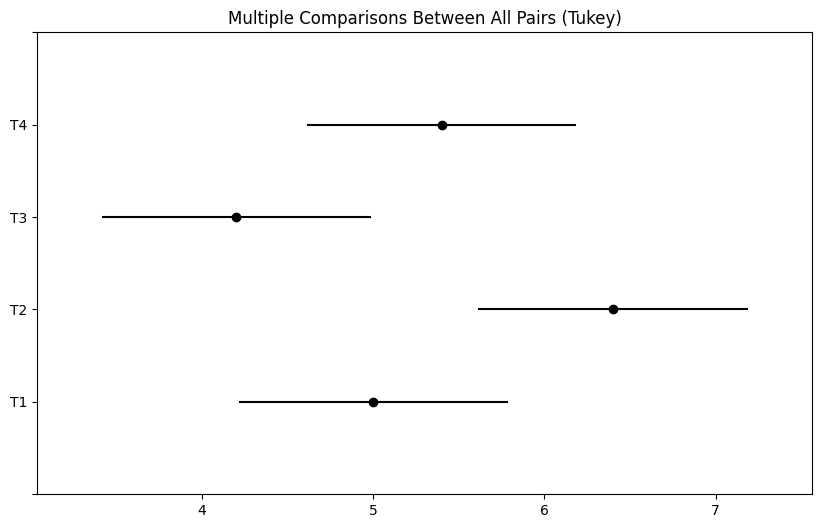

In [ ]:

# **2.10 Comparaciones Múltiples:S_Ferroso**
tukey = pairwise_tukeyhsd(endog=DBCA["V_Sanguineo"],     # Data
                          groups=DBCA["S_Ferroso"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

# **2.11 Comparaciones Múltiples:Pesos**

group1,group2,meandiff,p-adj,lower,upper,reject
B1,B2,-0.0,1.0,-2.5771,2.5771,False
B1,B3,0.775,0.8814,-1.8021,3.3521,False
B1,B4,-0.0,1.0,-2.5771,2.5771,False
B1,B5,0.975,0.7686,-1.6021,3.5521,False
B2,B3,0.775,0.8814,-1.8021,3.3521,False
B2,B4,0.0,1.0,-2.5771,2.5771,False
B2,B5,0.975,0.7686,-1.6021,3.5521,False
B3,B4,-0.775,0.8814,-3.3521,1.8021,False
B3,B5,0.2,0.9992,-2.3771,2.7771,False
B4,B5,0.975,0.7686,-1.6021,3.5521,False


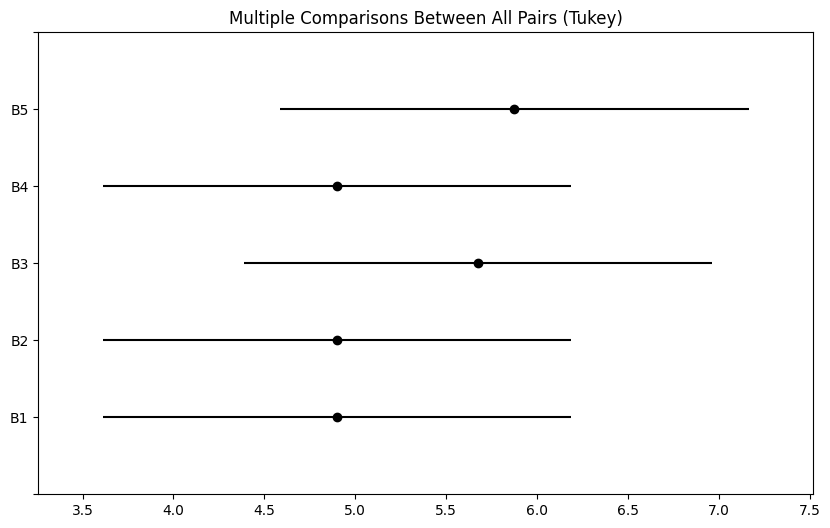

In [ ]:

# **2.11 Comparaciones Múltiples:Pesos**
tukey = pairwise_tukeyhsd(endog=DBCA["V_Sanguineo"],     # Data
                          groups=DBCA["Pesos"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

# **2.12 Supuesto del Modelo: Normalidad Prueba de  Shapiro Wilks**

In [ ]:

# **3.12 Supuesto del Modelo: Normalidad Prueba de  Shapiro Wilks**
w, pvalue = stats.shapiro(modeloDBCA.resid)
print(w, pvalue)

0.955288290977478 0.4545067846775055


# **2.13  Supuesto del Modelo: Normalidad: Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

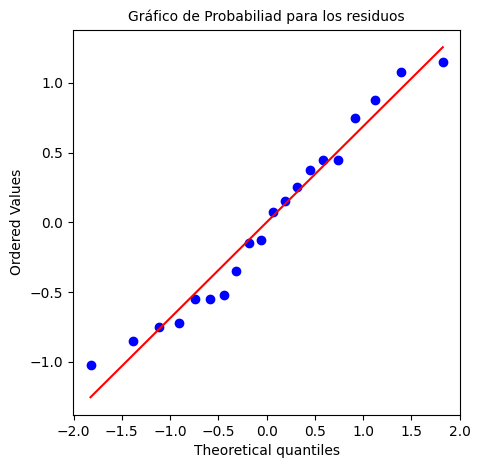

In [ ]:
# **2.13  Supuesto del Modelo: Normalidad: Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modeloDBCA.resid, plot= plt, rvalue= False)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

# **2.14 Residuos del Modelo**

In [ ]:
# **2.14 Residuos del Modelo**
modeloDBCA.resid.describe()

count    2.000000e+01
mean     6.217249e-16
std      6.627296e-01
min     -1.025000e+00
25%     -5.500000e-01
50%     -2.500000e-02
75%      4.500000e-01
max      1.150000e+00
dtype: float64

# **2.15 Histograma de Residuos**

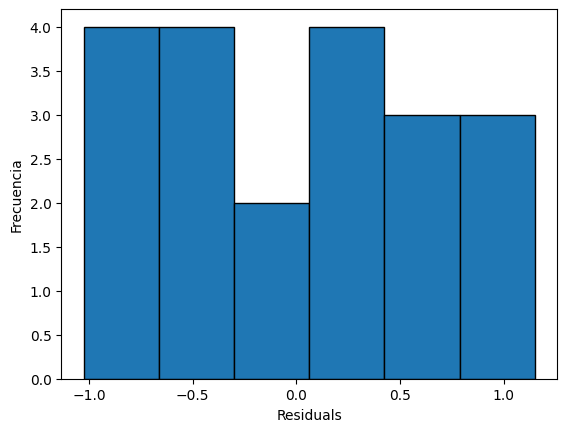

In [ ]:

# **2.15 Histograma de Residuos**
plt.hist(modeloDBCA.resid, bins='auto', histtype='bar', ec='k')

plt.xlabel("Residuals")
plt.ylabel('Frecuencia')
plt.show()


# **2.16 Histograma + curva normal teórica**

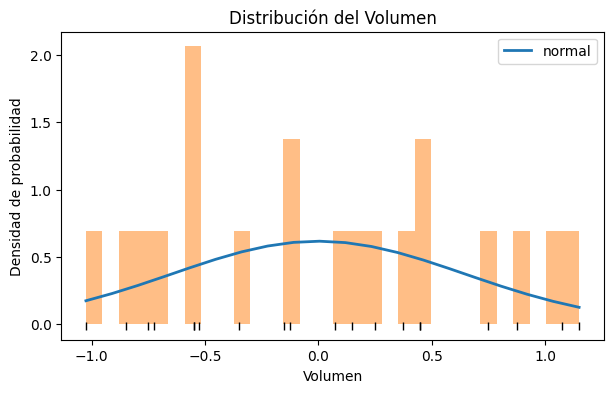

In [ ]:
# **2.16 Histograma + curva normal teórica**
# ==============================================================================
Volumen = modeloDBCA.resid
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(Volumen)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(Volumen), max(Volumen), num=20)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=Volumen, density=True, bins=30,  alpha=0.5)
ax.plot(Volumen, np.full_like(Volumen, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del Volumen')
ax.set_xlabel('Volumen')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

# **2.17 Gráfico Q-Q**

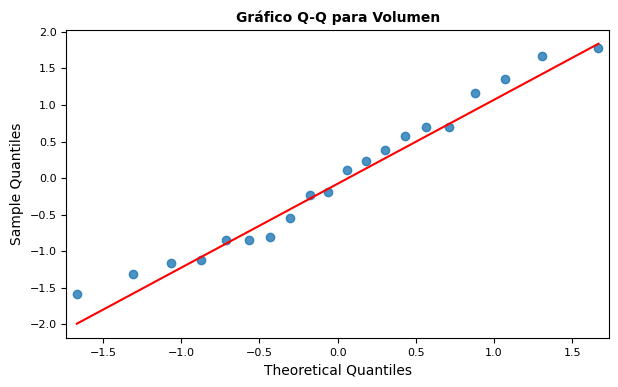

In [ ]:
# **2.17 Gráfico Q-Q**
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    Volumen,
    fit   = True,
    line  = 'q',
    alpha = 0.8,
    lw    = 5,
    ax    = ax
)
ax.set_title('Gráfico Q-Q para Volumen', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 8)

In [ ]:
# 2.18. Homocedasticidad de los residuos: Usando la prueba de Levene
stats.levene(DBCA['V_Sanguineo'][DBCA['S_Ferroso'] == 'T1'],
             DBCA['V_Sanguineo'][DBCA['S_Ferroso'] == 'T2'],
             DBCA['V_Sanguineo'][DBCA['S_Ferroso'] == 'T3'],
             DBCA['V_Sanguineo'][DBCA['S_Ferroso'] == 'T4'])

LeveneResult(statistic=1.2169576059850375, pvalue=0.33572362617286766)